In [4]:
import matplotlib
import matplotlib.pyplot as plt

import jax
import jax.numpy as np
from jax.random import PRNGKey

import numpyro
import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS, Predictive

import pandas as pd

import covid
import covid.util as util

# Load Data and Set Parameters

In [2]:

import covid.models.SEIRD_variable_detection
import covid.models.SEIRD

data = util.load_data()
place = 'NY'


util.run_place(data, 
               place, 
               start='2020-03-15', 
               end='2020-04-27',
               T_future=8*7,
               model_abrv = "SEIRD",
               model_type = covid.models.SEIRD.SEIRD,
               num_warmup=100, 
               num_samples=100)

 * running MCMC


sample: 100%|██████████| 200/200 [01:06<00:00,  3.00it/s, 511 steps of size 8.64e-03. acc. prob=0.64] 



                  mean       std    median      5.0%     95.0%     n_eff     r_hat
          D0     13.46      2.02     13.18     10.80     16.82     54.38      0.99
          E0   8195.65   5300.96   7192.46    865.37  16546.90     23.08      1.02
          H0     88.23     28.61     87.39     32.61    128.23     45.30      1.00
          I0   1835.77    467.11   1794.89   1211.08   2391.03     62.29      1.00
     beta[0]      2.24      0.66      2.22      1.30      3.16     13.54      1.05
     beta[1]      2.32      0.64      2.20      1.26      3.35     32.56      1.03
     beta[2]      2.42      0.69      2.36      1.57      3.61     43.68      0.99
     beta[3]      2.20      0.65      2.04      1.13      3.16     20.21      0.99
     beta[4]      2.06      0.56      2.02      1.17      2.83     19.66      0.99
     beta[5]      1.84      0.55      1.73      0.94      2.66     41.04      0.99
     beta[6]      1.82      0.65      1.74      0.82      2.65     34.20      0.99
   

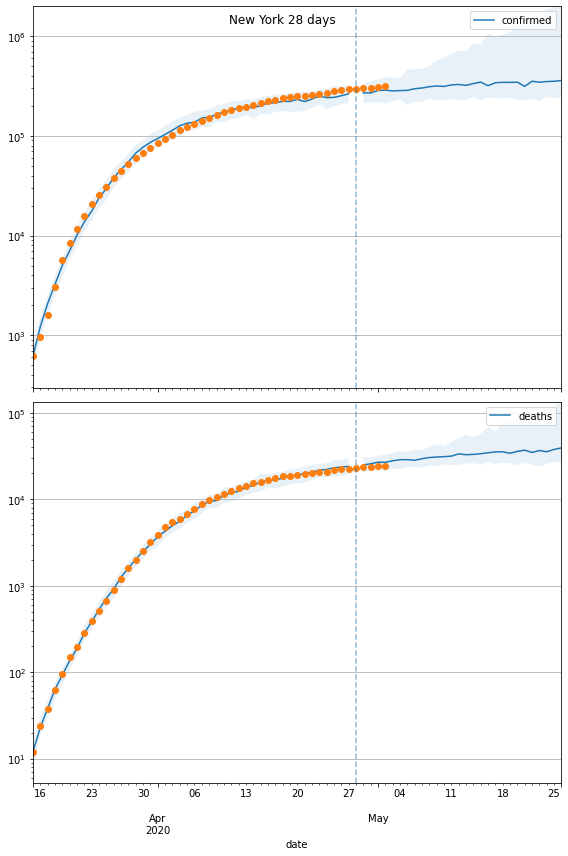

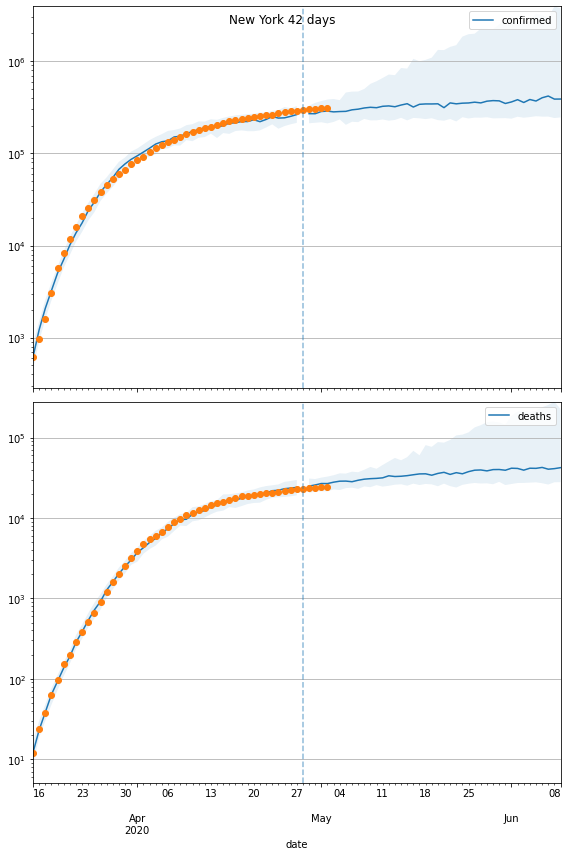

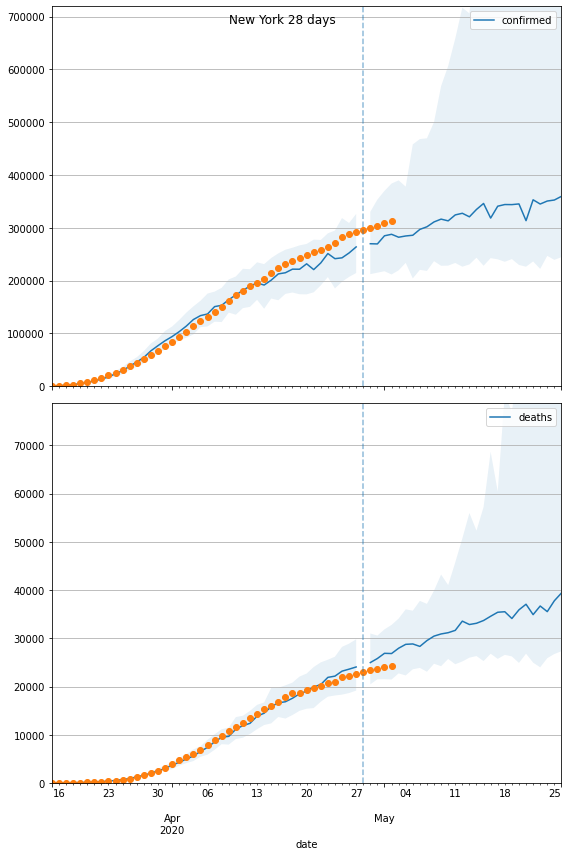

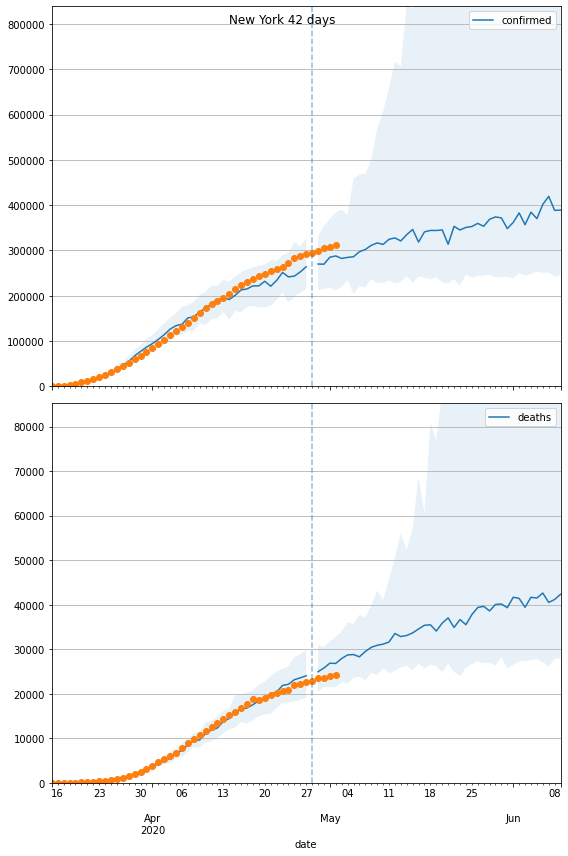

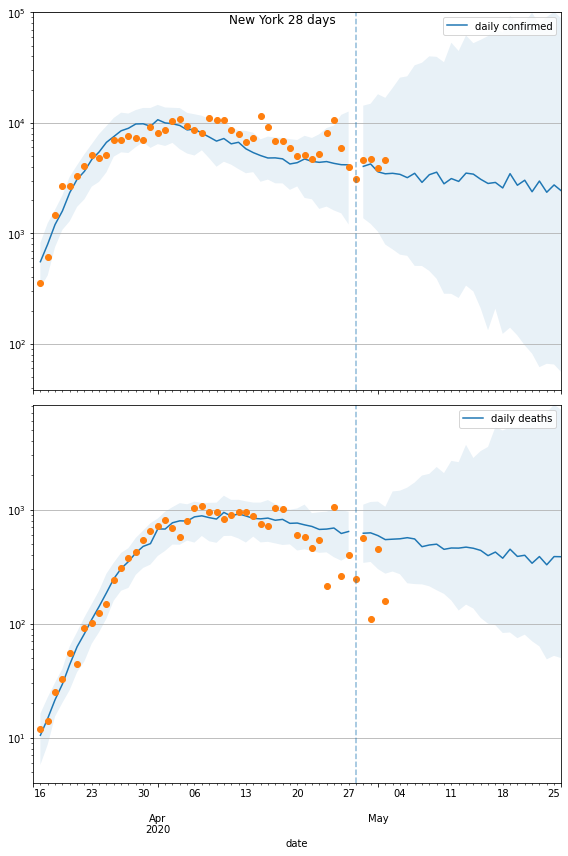

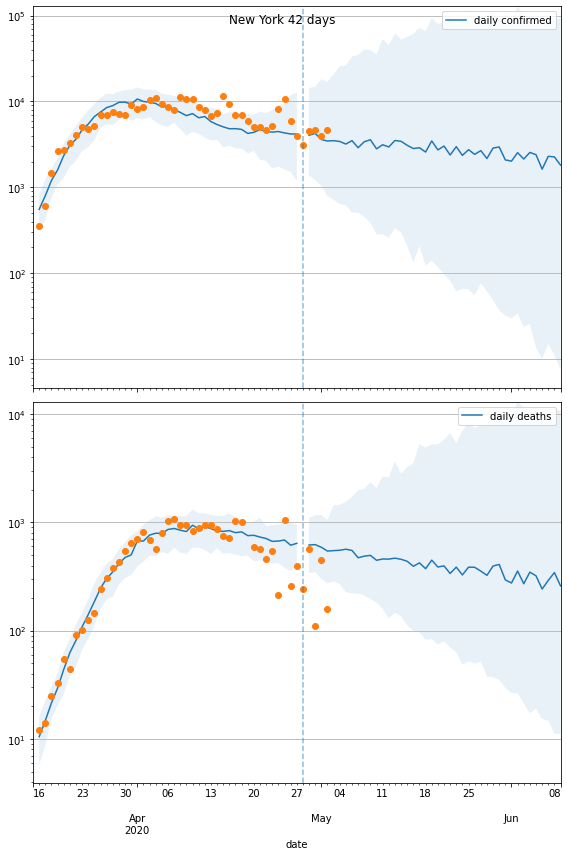

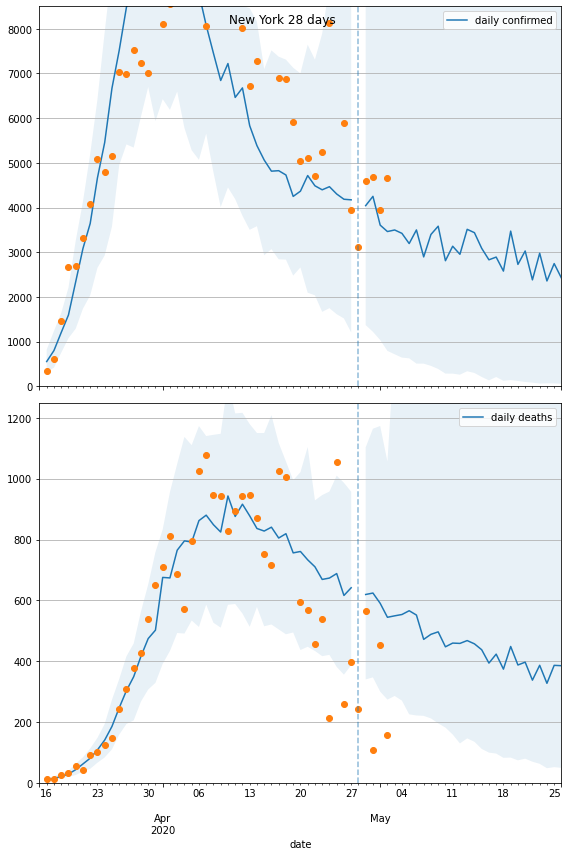

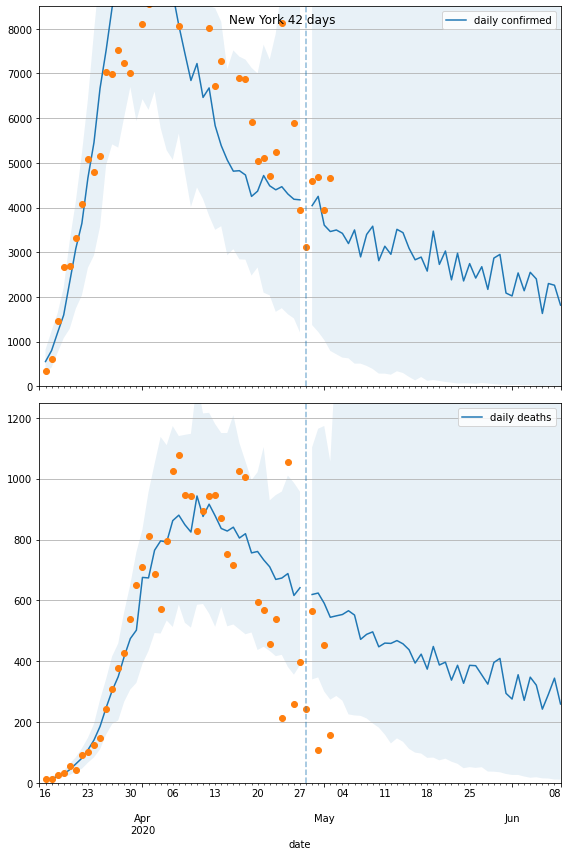

<Figure size 360x216 with 0 Axes>

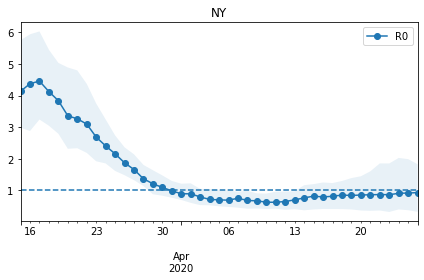

In [4]:
data = util.load_data()
place = 'NY'
util.gen_forecasts(data, 
                   place, 
                   start = '2020-03-15',
                   model_abrv = "SEIRD",
                   model_type=covid.models.SEIRD.SEIRD)

In [ ]:
%debug


3383.4000651041665
486.171875


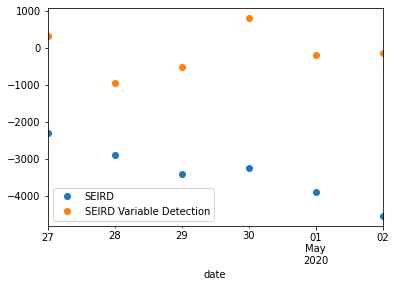

In [7]:
import covid.util as util
import covid.models.SEIRD_variable_detection

data = util.load_data()

## Validation: can only do cumulative for now...
start_eval = '2020-04-27'
_,m1_mae = util.score_forecats(start=start_eval,place='NY',data=data)

print (m1_mae)

err_plotm2,m2_mae = util.score_forecats(start=start_eval,place='NY',data=data,
                            model_abrv="SEIRD_variable_detection",
                             model=covid.models.SEIRD_variable_detection.SEIRD())

print (m2_mae)
plt.legend(["SEIRD","SEIRD Variable Detection"])
plt.show()
#plt.title(f"{place} MAE={mae:.2f}")
#plt.show()

